<a href="https://colab.research.google.com/github/Ahmed-M-Elshazly/Homework-6/blob/main/Homework6_Prob_2_a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Homework 6
#Problem 2-a
#Ahmed Elshazly
#801420724

In [ ]:
import torch
import torch.optim as optim
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import time
from datetime import timedelta
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.decomposition import PCA

In [ ]:
breast = load_breast_cancer()
breast_data = breast.data
breast_data.shape


(569, 30)

In [ ]:
breast_input = pd.DataFrame(breast_data)
breast_input.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
breast_labels = breast.target
breast_labels.shape
labels = np.reshape(breast_labels,(569,1))
final_breast_data = np.concatenate([breast_data,labels],axis=1)
final_breast_data.shape
breast_dataset = pd.DataFrame(final_breast_data)
features = breast.feature_names
features_labels = np.append(features,'label')
breast_dataset.columns = features_labels
dataset=breast_dataset
dataset.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [ ]:
X = dataset.iloc[:, 0:30].values
Y = dataset.iloc[:, 30].values
sc_X = StandardScaler()
X = sc_X.fit_transform(X)
X = torch.tensor(X)
Y = torch.tensor(Y)
n_samples=X.shape[0]
n_val=int(0.2*n_samples)
shuffled_indices=torch.randperm(n_samples)

train_indices=shuffled_indices[ : -n_val]
val_indices=shuffled_indices[-n_val :]

train_X=X[train_indices]
train_Y=Y[train_indices]

val_X=X[val_indices]
val_Y=Y[val_indices]

train_X = train_X.float()
val_X = val_X.float()
train_Y = train_Y.float()
val_Y = val_Y.float()

train_Y = train_Y.long()
val_Y = val_Y.long()

In [ ]:
def train (n_epochs, model, optimizer, loss_fn, x_train, y_train, x_val, y_val):
  train_loss_list = []
  val_loss_list = []
  val_accuracy_list = []
  for epoch in range(n_epochs+1):
    train_x_p=model(x_train)
    train_loss=loss_fn(train_x_p,y_train)

    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

    with torch.no_grad():
      val_x_p=model(x_val)
      val_loss=loss_fn(val_x_p,y_val)
      assert val_loss.requires_grad==False
      _, val_pred = torch.max(val_x_p, dim=1)
      val_correct = (val_pred == y_val).float().sum()
      val_accuracy = (val_correct / y_val.shape[0]).item()
      val_accuracy_list.append(val_accuracy)

    train_loss_list.append(train_loss.detach().item())
    val_loss_list.append(val_loss.detach().item())

    if epoch % 500==0:
      print(f"Epoch {epoch}, Training loss {train_loss:.4f}, Validation loss {val_loss:.4f},Accuracy {val_accuracy:.4f}")

  # After training, compute confusion matrix
  with torch.no_grad():
    val_x_p = linear_model(val_X)  # or your model, use your validation set here
    _, predicted = torch.max(val_x_p, 1)  # Get predicted class labels

  # Compute confusion matrix
  cm = confusion_matrix(val_Y.numpy(), predicted.numpy())  # Convert tensors to numpy
  print(f"Confusion Matrix:\n{cm}")
  report = classification_report(val_Y.numpy(), predicted.numpy())
  print(report)

  return train_loss_list, val_loss_list,val_accuracy_list

In [ ]:
def get_model_size(model):
    total_params = sum(p.numel() for p in model.parameters())
    trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
    return total_params, trainable_params

Epoch 0, Training loss 0.6675, Validation loss 0.6406,Accuracy 0.6549
Epoch 500, Training loss 0.0986, Validation loss 0.0928,Accuracy 0.9823
Epoch 1000, Training loss 0.0765, Validation loss 0.0671,Accuracy 0.9823
Epoch 1500, Training loss 0.0680, Validation loss 0.0582,Accuracy 0.9912
Epoch 2000, Training loss 0.0631, Validation loss 0.0538,Accuracy 0.9912
Epoch 2500, Training loss 0.0599, Validation loss 0.0510,Accuracy 0.9912
Epoch 3000, Training loss 0.0575, Validation loss 0.0490,Accuracy 0.9912
Epoch 3500, Training loss 0.0557, Validation loss 0.0475,Accuracy 0.9912
Epoch 4000, Training loss 0.0541, Validation loss 0.0462,Accuracy 0.9912
Epoch 4500, Training loss 0.0526, Validation loss 0.0452,Accuracy 0.9912
Epoch 5000, Training loss 0.0513, Validation loss 0.0443,Accuracy 0.9912
Confusion Matrix:
[[42  1]
 [ 0 70]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.99      1.00      0.99        70



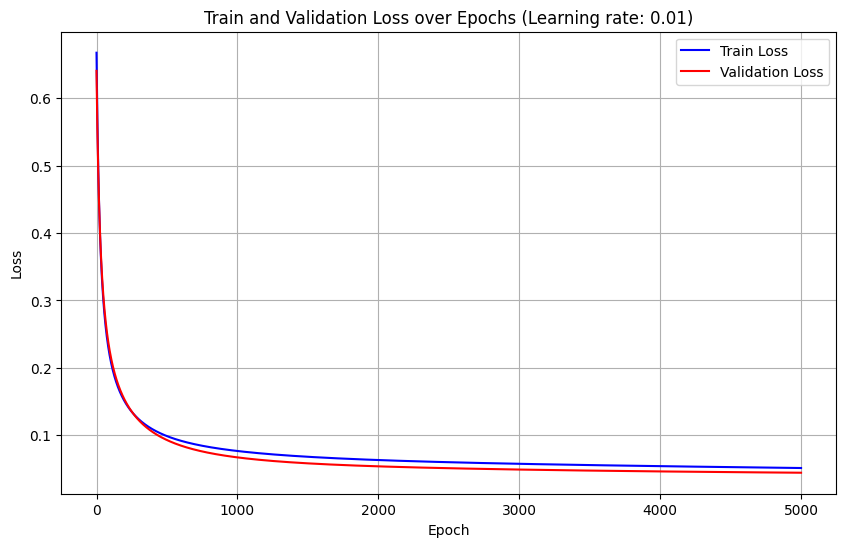

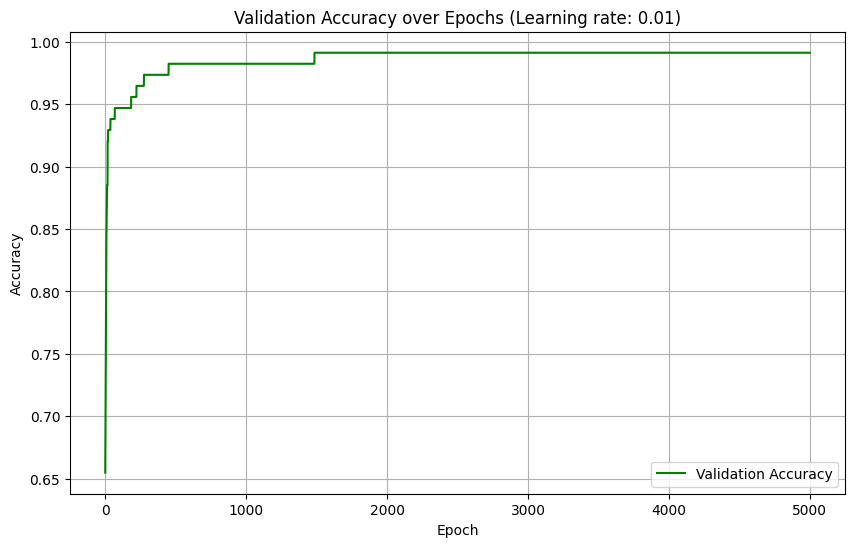

In [ ]:
number_of_epochs=5000
learning_rate=0.01
linear_model = nn.Sequential(
    nn.Linear(train_X.shape[1], 32),
    nn.Tanh(),
    nn.Linear(32, 2),
    nn.LogSoftmax(dim=1)
)
optimizer = optim.SGD(linear_model.parameters(), lr=learning_rate)
start_time = time.time()
train_loss, val_loss,val_accu=train(
      n_epochs=number_of_epochs,
      model=linear_model,
      optimizer=optimizer,
      loss_fn=nn.NLLLoss(),
      x_train=train_X,
      y_train=train_Y,
      x_val=val_X,
      y_val=val_Y
  )
end_time = time.time()
elapsed_time = end_time - start_time
formatted_time = str(timedelta(seconds=elapsed_time))
# Print the training time
print(f"Training time for learning rate {learning_rate}: {formatted_time}")
total_params, trainable_params = get_model_size(linear_model)
print(f"Model with learning rate {learning_rate}:")
print(f"  Total parameters: {total_params}")
print(f"  Trainable parameters: {trainable_params}")
#print(f"Final parameters with learning rate {learning_rate}: {trained_parameters}")
plt.figure(figsize=(10, 6))
plt.plot(range(0, number_of_epochs+1), train_loss, label='Train Loss', color='blue')
plt.plot(range(0, number_of_epochs+1), val_loss, label='Validation Loss', color='red')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title(f'Train and Validation Loss over Epochs (Learning rate: {learning_rate})')
plt.legend()
plt.grid(True)
plt.show()
# Plot Validation Accuracy
plt.figure(figsize=(10, 6))
plt.plot(range(0, number_of_epochs + 1), val_accu, label='Validation Accuracy', color='green')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title(f'Validation Accuracy over Epochs (Learning rate: {learning_rate})')
plt.legend()
plt.grid(True)
plt.show()

Epoch 0, Training loss 0.7521, Validation loss 0.7228,Accuracy 0.3894
Epoch 500, Training loss 0.0982, Validation loss 0.0885,Accuracy 0.9823
Epoch 1000, Training loss 0.0756, Validation loss 0.0657,Accuracy 0.9823
Epoch 1500, Training loss 0.0667, Validation loss 0.0582,Accuracy 0.9912
Epoch 2000, Training loss 0.0617, Validation loss 0.0544,Accuracy 0.9912
Epoch 2500, Training loss 0.0585, Validation loss 0.0521,Accuracy 0.9823
Epoch 3000, Training loss 0.0561, Validation loss 0.0505,Accuracy 0.9823
Epoch 3500, Training loss 0.0543, Validation loss 0.0492,Accuracy 0.9823
Epoch 4000, Training loss 0.0527, Validation loss 0.0482,Accuracy 0.9823
Epoch 4500, Training loss 0.0513, Validation loss 0.0474,Accuracy 0.9823
Epoch 5000, Training loss 0.0500, Validation loss 0.0467,Accuracy 0.9823
Confusion Matrix:
[[41  2]
 [ 0 70]]
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       0.97      1.00      0.99        70



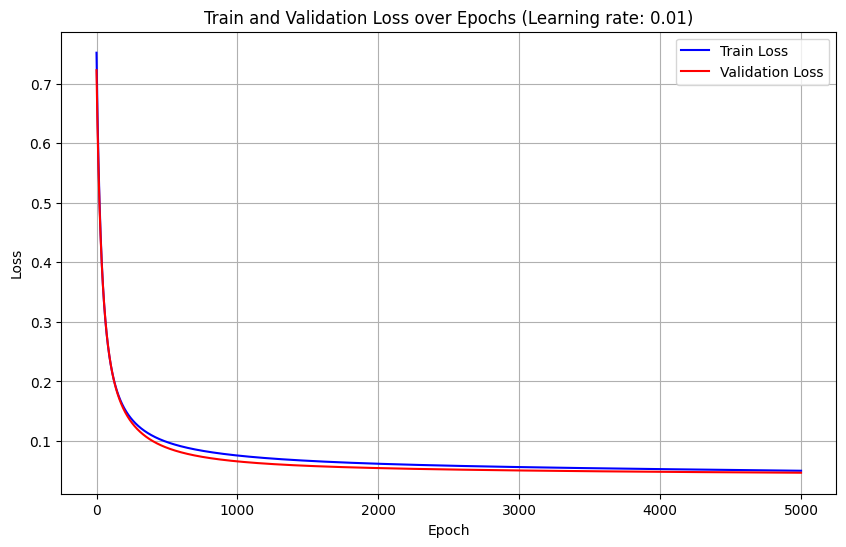

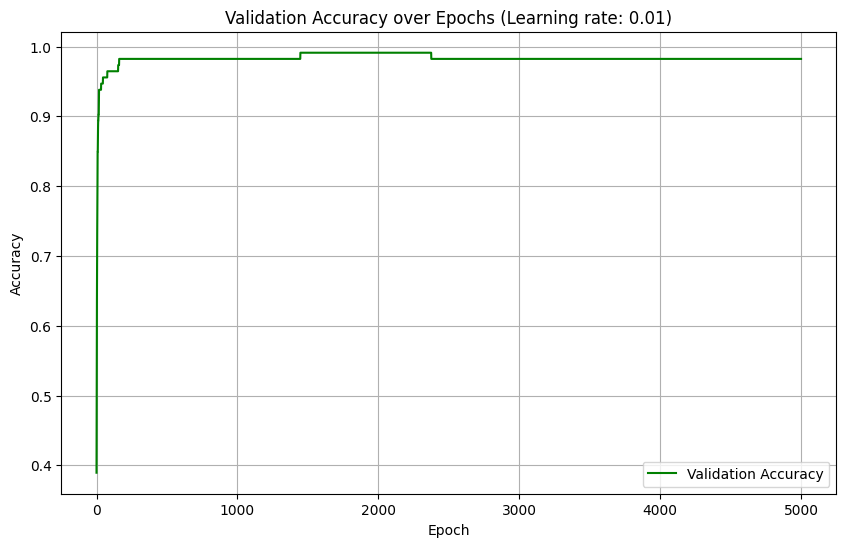

Epoch 0, Training loss 0.7015, Validation loss 0.7061,Accuracy 0.4867
Epoch 500, Training loss 0.3260, Validation loss 0.3421,Accuracy 0.9115
Epoch 1000, Training loss 0.2313, Validation loss 0.2461,Accuracy 0.9469
Epoch 1500, Training loss 0.1883, Validation loss 0.1998,Accuracy 0.9469
Epoch 2000, Training loss 0.1629, Validation loss 0.1707,Accuracy 0.9469
Epoch 2500, Training loss 0.1457, Validation loss 0.1503,Accuracy 0.9558
Epoch 3000, Training loss 0.1330, Validation loss 0.1349,Accuracy 0.9558
Epoch 3500, Training loss 0.1233, Validation loss 0.1229,Accuracy 0.9558
Epoch 4000, Training loss 0.1156, Validation loss 0.1134,Accuracy 0.9735
Epoch 4500, Training loss 0.1093, Validation loss 0.1056,Accuracy 0.9735
Epoch 5000, Training loss 0.1040, Validation loss 0.0991,Accuracy 0.9735
Confusion Matrix:
[[41  2]
 [ 1 69]]
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        70



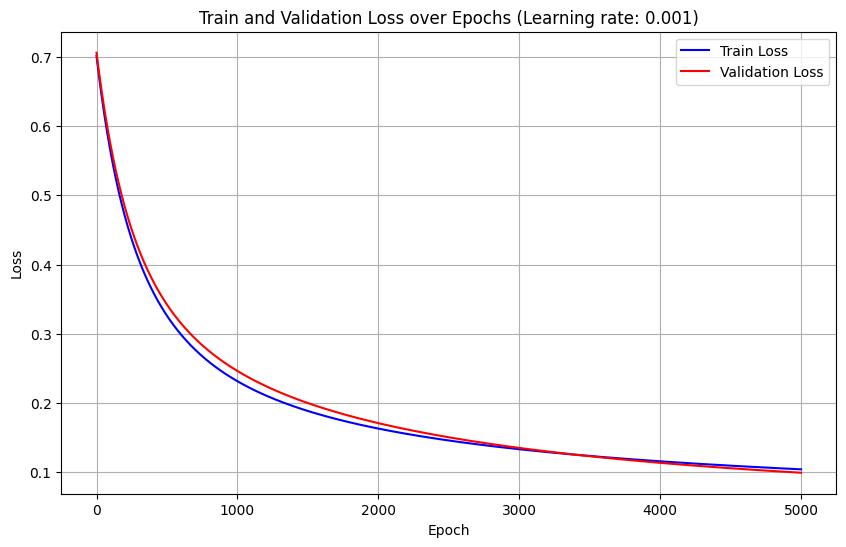

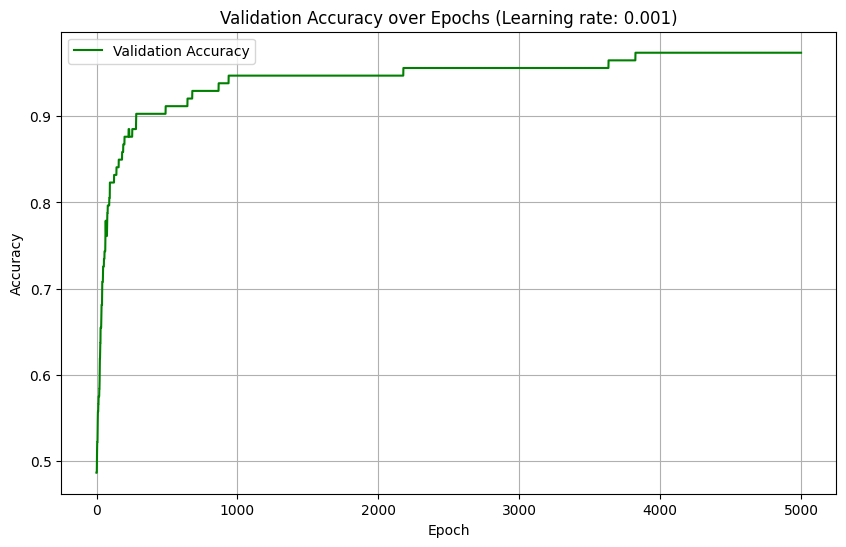

Epoch 0, Training loss 0.8386, Validation loss 0.8391,Accuracy 0.1327
Epoch 500, Training loss 0.7320, Validation loss 0.7379,Accuracy 0.3097
Epoch 1000, Training loss 0.6485, Validation loss 0.6579,Accuracy 0.6460
Epoch 1500, Training loss 0.5820, Validation loss 0.5934,Accuracy 0.8673
Epoch 2000, Training loss 0.5282, Validation loss 0.5407,Accuracy 0.9204
Epoch 2500, Training loss 0.4840, Validation loss 0.4970,Accuracy 0.9381
Epoch 3000, Training loss 0.4470, Validation loss 0.4602,Accuracy 0.9381
Epoch 3500, Training loss 0.4159, Validation loss 0.4289,Accuracy 0.9381
Epoch 4000, Training loss 0.3892, Validation loss 0.4021,Accuracy 0.9381
Epoch 4500, Training loss 0.3662, Validation loss 0.3788,Accuracy 0.9381
Epoch 5000, Training loss 0.3461, Validation loss 0.3584,Accuracy 0.9381
Confusion Matrix:
[[39  4]
 [ 3 67]]
              precision    recall  f1-score   support

           0       0.93      0.91      0.92        43
           1       0.94      0.96      0.95        70



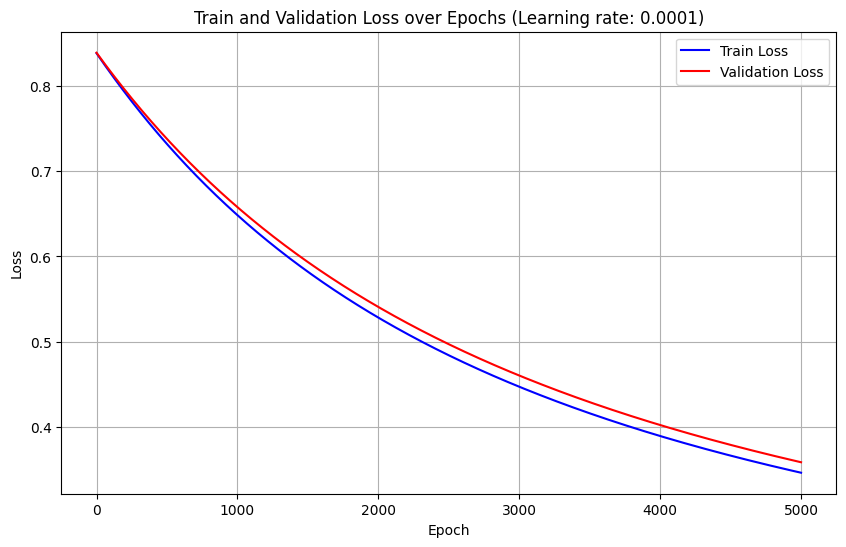

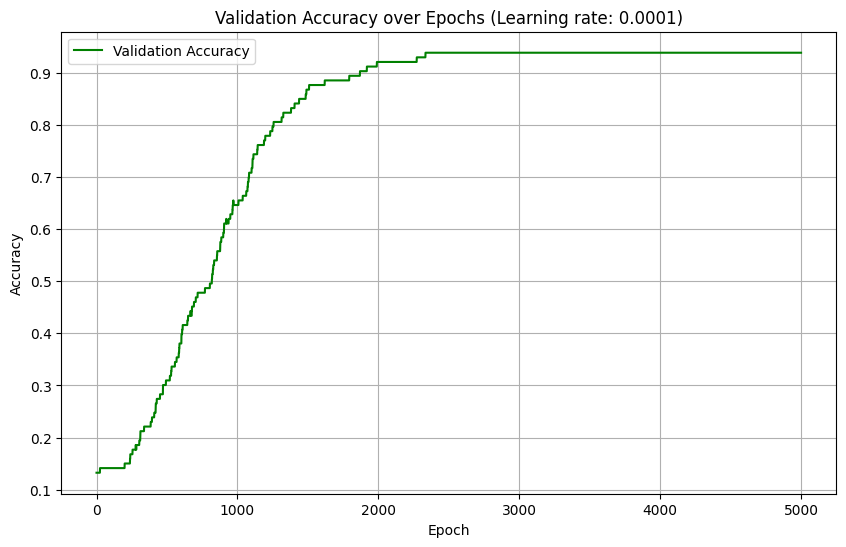

In [ ]:
number_of_epochs=5000
learning_rates=[0.01,0.001,0.0001]

for learning_rate in learning_rates:
  linear_model = nn.Sequential(
    nn.Linear(train_X.shape[1], 32),
    nn.Tanh(),
    nn.Linear(32, 2),
    nn.LogSoftmax(dim=1)
  )
  optimizer = optim.SGD(linear_model.parameters(), lr=learning_rate)
  start_time = time.time()
  train_loss, val_loss,val_accu=train(
        n_epochs=number_of_epochs,
        model=linear_model,
        optimizer=optimizer,
        loss_fn=nn.NLLLoss(),
        x_train=train_X,
        y_train=train_Y,
        x_val=val_X,
        y_val=val_Y
    )
  end_time = time.time()
  elapsed_time = end_time - start_time
  formatted_time = str(timedelta(seconds=elapsed_time))
  # Print the training time
  print(f"Training time for learning rate {learning_rate}: {formatted_time}")
  total_params, trainable_params = get_model_size(linear_model)
  print(f"Model with learning rate {learning_rate}:")
  print(f"  Total parameters: {total_params}")
  print(f"  Trainable parameters: {trainable_params}")
  #print(f"Final parameters with learning rate {learning_rate}: {trained_parameters}")
  plt.figure(figsize=(10, 6))
  plt.plot(range(0, number_of_epochs+1), train_loss, label='Train Loss', color='blue')
  plt.plot(range(0, number_of_epochs+1), val_loss, label='Validation Loss', color='red')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.title(f'Train and Validation Loss over Epochs (Learning rate: {learning_rate})')
  plt.legend()
  plt.grid(True)
  plt.show()
  # Plot Validation Accuracy
  plt.figure(figsize=(10, 6))
  plt.plot(range(0, number_of_epochs + 1), val_accu, label='Validation Accuracy', color='green')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.title(f'Validation Accuracy over Epochs (Learning rate: {learning_rate})')
  plt.legend()
  plt.grid(True)
  plt.show()
